# Decision Trees and Random Forests

## 1. What is a decision tree?

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression.
The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred 
from the data features. 
A tree can be seen as a piecewise constant approximation. 

## 2. What are the advantages and disadvantages of a decision tree?

In [ ]:
Disadvantage:
1.)A small change in the data can cause a large change in the structure of the decision tree causing instability.
2.)For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
3.)Decision tree often involves higher time to train the model.
4.)Decision tree training is relatively expensive as the complexity and time has taken are more.
5.)The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.


Advantages:
1.)Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
2.)A decision tree does not require normalization of data.
3.)A decision tree does not require scaling of data as well.
4.)Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
5.)A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

## 3. Explain pruning

Pruning is a data compression technique in machine learning and search algorithms that reduces the size of
decision trees by removing sections of the tree that are non-critical and 
redundant to classify instances.

## 4. What is ensembling?

Ensembles are predictive models that combine predictions from two or more other models. Ensemble learning methods 
are popular and the go-to technique when the best performance on a predictive modeling project 
is the most important outcome.

## 5. Explain bagging

Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a 
noisy dataset. In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data 
points can be chosen more than once. After several data samples are generated, these weak models are then trained independently, 
and depending on the type of task—regression or classification,for example—the average or majority of those predictions yield a more accurate estimate

## 6. What are random forests?

The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and 
feature randomness when building each individual tree to try to create an uncorrelated forest of trees 
whose prediction by committee is more accurate than that of any individual tree.

## 7. Classify the iris dataset using decision trees

In [129]:
# importing libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import load_iris, load_boston
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Loading the dataset
iris = load_iris()
Iris1=pd.DataFrame(data=iris.data)
Iris2=pd.DataFrame(data=iris.target)
Iris2=Iris2.replace(0,'Setosa')
Iris2=Iris2.replace(1,'Versicolour')
Iris2=Iris2.replace(2,'Virginica')
Iris2[0].unique()

array(['Setosa', 'Versicolour', 'Virginica'], dtype=object)

In [130]:
# Training a decision tree
X_train, X_test, y_train, y_test = train_test_split(Iris1, Iris2, test_size = 0.3, random_state = 1)
clf = DecisionTreeClassifier(criterion='gini',max_depth = 3,min_samples_split=2, min_samples_leaf=1,random_state=10)
clf = clf.fit(X_train,y_train)  

In [131]:
y_test_pred = clf.predict(X_test)
confusion_matrix(y_test, y_test_pred)

array([[14,  0,  0],
       [ 0, 17,  1],
       [ 0,  1, 12]], dtype=int64)

In [132]:
clf.feature_importances_

array([0.        , 0.        , 0.06600367, 0.93399633])

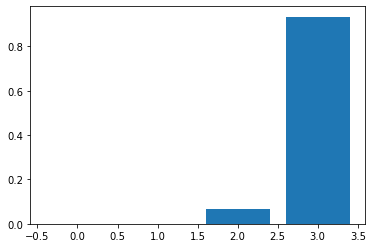

In [133]:
# Horizontal Bar Plot
plt.bar(X_train.columns.tolist(), clf.feature_importances_)
 
# Show Plot
plt.show()

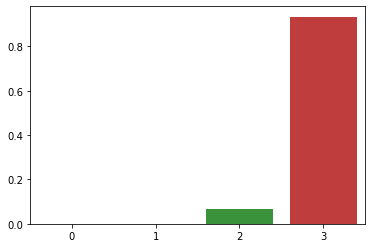

In [134]:
import seaborn as sns
# who v/s fare barplot
sns.barplot(x = X_train.columns.tolist(),
            y = clf.feature_importances_.tolist())
 
# Show the plot
plt.show()

In [135]:
clf.feature_importances_

array([0.        , 0.        , 0.06600367, 0.93399633])

In [136]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
 Versicolour       0.94      0.94      0.94        18
   Virginica       0.92      0.92      0.92        13

    accuracy                           0.96        45
   macro avg       0.96      0.96      0.96        45
weighted avg       0.96      0.96      0.96        45



## 8. Tune the hyper parameters and comment the meaning of each hyper parameter you have tuned

In [ ]:
1.)criterion=gini, This is to measure the quality of a split in the decision tree. gini for the Gini impurity and entropy for the information gain
2.)max_depth=6, Here the depth of the tree will be upto 6 only. If not specified than till nodes are not pure it is going to split
3.)min_samples_split=2,The minimum number of smaples needed to split an internal node.Needed to avoid overfitting
4.)min_samples_leaf=1,The minimum number of samples required to be at a leaf node. Needed to avoid overfitting
5.)random_state=10,  Controls the randomness of the estimator. The features are always randomly permuted at each split, even if     
   splitter is set to "best". When max_features < n_features, the algorithm will select max_features at random at each split before 
   finding the best split among them


In [137]:
#X_train.columns.tolist()
#clf.feature_importances_.tolist()

## 9. Plot the tree and feature importances

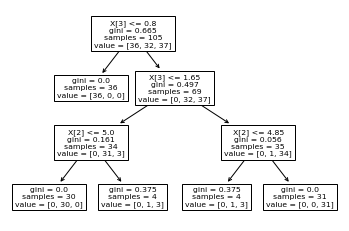

In [138]:
# Plotting the tree
tree.plot_tree(clf)
#plot=tree.export_graphviz(clf,out_file=None)
#graph=graphviz.Source(plot)
#graph
plt.show()

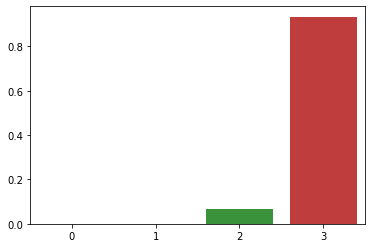

In [139]:
sns.barplot(x = X_train.columns.tolist(),
            y = clf.feature_importances_.tolist())
 
# Show the plot
plt.show()

## 10. Repeat questions 7 and 8 using random forests

In [140]:
# training the model Random Forest
rr = RandomForestClassifier(n_estimators=10,max_depth = 10, random_state = 100,criterion='gini', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0)
rr.fit(X_train, y_train)
y_train_pred = rr.predict(X_train)

C:\Users\Checkout\AppData\Local\Temp/ipykernel_11836/4151876159.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rr.fit(X_train, y_train)


In [141]:
y_test_pred = rr.predict(X_test)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        36
 Versicolour       1.00      1.00      1.00        32
   Virginica       1.00      1.00      1.00        37

    accuracy                           1.00       105
   macro avg       1.00      1.00      1.00       105
weighted avg       1.00      1.00      1.00       105



In [ ]:
1.)n_estimators=10, The number of trees in the forest.
2.)max_depth = 10,The maximum depth of the tree. 
3.)random_state = 100,Controls both the randomness of the bootstrapping of the samples
4.)criterion='gini',The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy”  
    for the information gain
5.)min_samples_split=2,The minimum number of samples required to split an internal node:
6.)min_samples_leaf=1, The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered 
   if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of      
   smoothing the model, especially in regression.

7.)min_weight_fraction_leaf=0.0,The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. 

## 11. pick top features from random forest again and try to create a model using only those.

In [142]:
rr.feature_importances_

array([0.04184027, 0.03058959, 0.42521066, 0.50235948])

In [143]:
X_train=X_train.drop([0, 1], axis=1)
X_test=X_test.drop([0, 1], axis=1)

In [144]:
rr = RandomForestClassifier(n_estimators=10,max_depth = 10, random_state = 100)
rr.fit(X_train, y_train)
y_train_pred = rr.predict(X_train)

C:\Users\Checkout\AppData\Local\Temp/ipykernel_11836/1017585758.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rr.fit(X_train, y_train)


In [145]:
y_test_pred = rr.predict(X_test)
print(classification_report(y_train,y_train_pred))

              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        36
 Versicolour       1.00      0.97      0.98        32
   Virginica       0.97      1.00      0.99        37

    accuracy                           0.99       105
   macro avg       0.99      0.99      0.99       105
weighted avg       0.99      0.99      0.99       105

